In [1]:
import os
import numpy as np
import pandas as pd
from os.path import join as pjoin
from matplotlib import pyplot as plt
from magicbox.algorithm.plot import show_bar_value
from nibrain.util.plotfig import auto_bar_width
from cxy_visual_dev.lib.predefine import dataset_name2info,\
    proj_dir

work_dir = pjoin(proj_dir, 'analysis/plot/plot_age_dist')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

In [14]:
def plot_bar(info_file, title, figsize=None, out_file=None):
    df = pd.read_csv(info_file)
    ages = np.array(df['age in years'])
    ages_uniq = np.unique(ages)
    n_age = len(ages_uniq)

    # x = np.arange(n_age)
    x = ages_uniq
    y = np.zeros(n_age, int)
    width = auto_bar_width(x)
    plt.figure(figsize=figsize)
    for idx, age in enumerate(ages_uniq):
        y[idx] = np.sum(ages == age)
    rects = plt.bar(x, y, width, fc='w', ec='k')
    show_bar_value(rects)
    plt.ylabel('#subject')
    plt.xlabel('age in years')
    plt.title(title)
    plt.xticks(x, ages_uniq)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.tight_layout()
    
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)


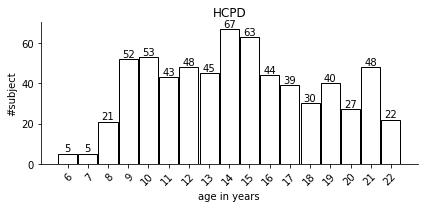

In [15]:
plot_bar(
    info_file=dataset_name2info['HCPD'],
    title='HCPD', figsize=(6, 3),
    out_file=pjoin(work_dir, 'HCPD_age_dist.jpg')
)

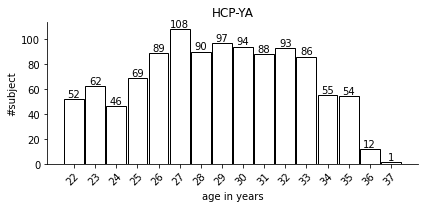

In [16]:
plot_bar(
    info_file=dataset_name2info['HCPY'],
    title='HCP-YA', figsize=(6, 3),
    out_file=pjoin(work_dir, 'HCPY_age_dist.jpg')
)

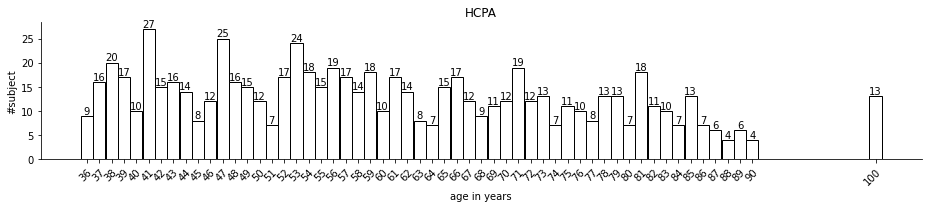

In [18]:
plot_bar(
    info_file=dataset_name2info['HCPA'],
    title='HCPA', figsize=(13, 3),
    out_file=pjoin(work_dir, 'HCPA_age_dist.jpg')
)